# XRD refinement with pySULI module (gsas2_lib_version)
***
The purpose of this notebook is to show how to use pySULI as a python package\
rather than importing necessary methods inside notebook cells.


***
# General imports
***

In [1]:
import sys
sys.path += ['..']

In [2]:
import pysuli



Checking required packages:

---pymatgen package with version 2024.4.13 is available and imported 
---ipympl package with version 0.9.4 is available and imported 
---numpy package with version 1.26.4 is available and imported 
---scipy package with version 1.13.1 is available and imported 
---pyFAI package with version 2024.2.0 is available and imported 
---xarray package with version 2023.6.0 is available and imported 
---fabio package with version 2024.4.0 is available and imported 
---mp_api package with version 0.41.2 is available and imported 
---pandas package with version 2.1.4 is available and imported 




Enter location of GSASII folder on your GSAS-II installation

 /opt/anaconda3/envs/GSASII/GSAS-II/GSASII


GSAS-II binary directory: /opt/anaconda3/envs/GSASII/GSAS-II/GSASII-bin/mac_64_p3.11_n1.26
7 values read from config file /opt/anaconda3/envs/GSASII/GSAS-II/GSASII/config.py


Imported pysuli with following configuration:

- gsas2_scratch : /Users/petermeshkov/.gsas2_scratch
- gsas2_lib : /opt/anaconda3/envs/GSASII/GSAS-II/GSASII


In [3]:
from pysuli.generic_methods import *
from pysuli.gsas2_utils import *
from pysuli.plotting_utils import *

In [4]:
# Here we check if this notebook is running on Google Colab.
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [5]:
# If the notebbok is running on Google Colab, we mount google drive to instance
# and enable enable_custom_widget_manager for ipympl package to work properly.
# See See: https://matplotlib.org/ipympl/ for ipympl

if IN_COLAB:
    # mount Google Drive
    from google.colab import drive
    drive.mount('/content/drive')
    # Enable enable_custom_widget_manager
    from google.colab import output
    output.enable_custom_widget_manager()

In [6]:
# importing matplotlib for plots.
%matplotlib widget
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.constrained_layout.use'] = True

***
# Refinements
***

In [7]:
# Assuming notebook and data folder are here.

here = os.getcwd()
example_data_path = 'example_data/xrd_refinement_with_gsas2/'

os.chdir('%s/%s'%(here,example_data_path))
os.listdir()

['ZrH.png',
 'Ceo2.cif',
 '.DS_Store',
 'gsas2_scratch',
 'Pt.cif',
 'LaB6.png',
 'Zr.cif',
 'Pt.gpx',
 'LaB6.nc',
 'Pt.png',
 'LaB6.cif',
 '.gsas2_scratch',
 '.ipynb_checkpoints',
 'ZrH.nc',
 'Zr-H1.66.cif',
 'Background.nc',
 'ZrH.gpx',
 'Pt.nc',
 'LaB6.gpx']

In [8]:
os.makedirs('gsas2_scratch',exist_ok=True)

In [9]:
%%writefile gsas2_scratch/gsas.instprm
#GSAS-II instrument parameter file; do not add/delete items!
Type:PXC
Bank:1.0
Lam:0.1824
Polariz.:7.277695011573669
Azimuth:0.0
Zero:-0.00025200085768731445
U:129.15268004188428
V:1.816645496453032
W:0.43034683098418736
X:-0.0661572816525536
Y:-0.9270864296622138
Z:0.02775503495558348
SH/L:0.002

Overwriting gsas2_scratch/gsas.instprm


In [10]:
with xr.open_dataset('Background.nc') as ds:
    da_input_bkg = ds.i2d.mean(dim='azimuthal')

***
### First refinement
***
Rather than using the refinement recipe, pySULI uses the `Refiner` class that stores the relevant data for refinement along with methods for that class that set the refinement parameters and plot the results 

/Users/petermeshkov/.gsas2_scratch
/Users/petermeshkov/.gsas2_scratch/1722967410.94_NT7YSXM.tmp
/Users/petermeshkov/.gsas2_scratch/1722967410.94_NT7YSXM.tmp/data.xy read by Reader comma/tab/semicolon separated
Instrument parameters read: /Users/petermeshkov/Repos/pySULI/notebooks/example_data/xrd_refinement_with_gsas2/gsas2_scratch/gsas.instprm (G2 fmt) bank None
/Users/petermeshkov/Repos/pySULI/notebooks/example_data/xrd_refinement_with_gsas2/LaB6.cif read by Reader CIF
gpx file saved as /Users/petermeshkov/.gsas2_scratch/1722967410.94_NT7YSXM.tmp/gsas.gpx
gpx file saved as /Users/petermeshkov/.gsas2_scratch/1722967410.94_NT7YSXM.tmp/gsas.gpx
gpx file saved as /Users/petermeshkov/.gsas2_scratch/1722967410.94_NT7YSXM.tmp/gsas.gpx
gpx file saved as /Users/petermeshkov/.gsas2_scratch/1722967410.94_NT7YSXM.tmp/gsas.gpx
gpx file saved as /Users/petermeshkov/.gsas2_scratch/1722967410.94_NT7YSXM.tmp/gsas.gpx
gpx file saved as /Users/petermeshkov/.gsas2_scratch/1722967410.94_NT7YSXM.tmp/gsas.

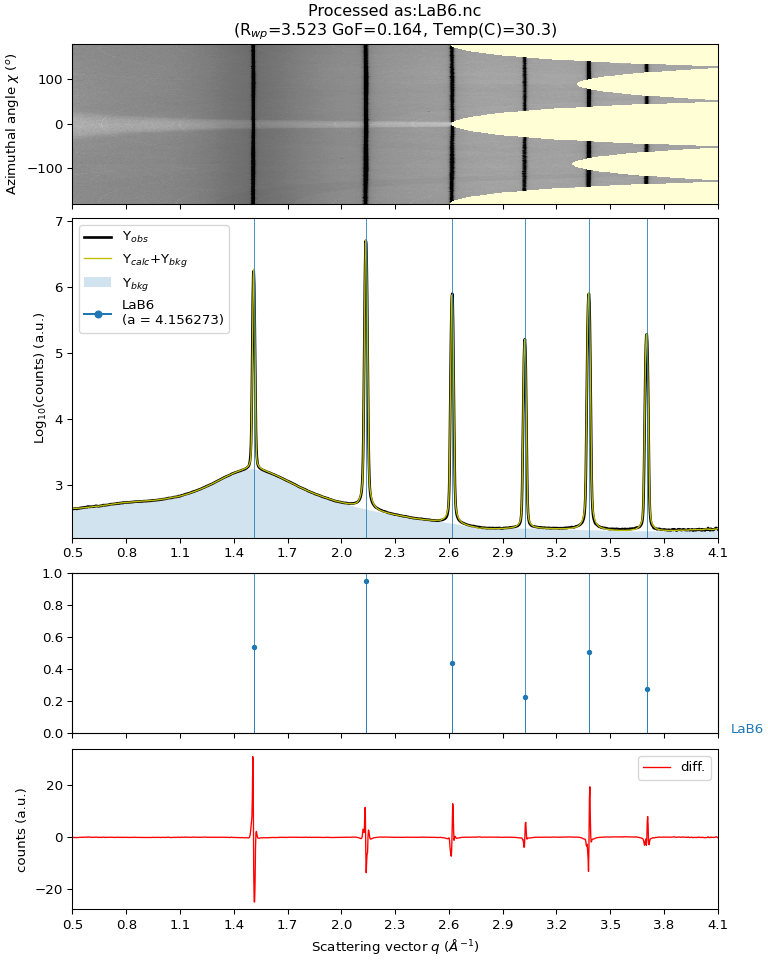

In [11]:
# Creating the refiner

LaB6_refiner = Refiner(
    nc_path = 'LaB6.nc',
    phases = [{'cif_abs_path':'LaB6.cif','phase_name':'LaB6','scale':1},],
    gsas2_scratch = pysuli_defaults['gsas2_scratch'],
    instrument_parameters_file = 'gsas2_scratch/gsas.instprm',
    q_range = [0.5,4.1],
    da_input_bkg = da_input_bkg 
#NOTE: Refiner can create its own background if set to None. Try both to see changes in GoF and Rwp
)


LaB6_refiner.refine_background(2)
LaB6_refiner.set_lebail(True)
LaB6_refiner.refine_cell_params()
for par in ['U', 'V', 'W']:
    LaB6_refiner.refine_inst_parameters(inst_pars_to_refine=[par])
for par in ['X', 'Y', 'Z']:
    LaB6_refiner.refine_inst_parameters(inst_pars_to_refine=[par])
for par in ['Zero']:
    LaB6_refiner.refine_inst_parameters(inst_pars_to_refine=[par])
LaB6_refiner.refine_background(10)
LaB6_refiner.refine_cell_params()
LaB6_refiner.save_refinement()
LaB6_refiner.plot_refinement_results()

***
### Second refinement
***

/Users/petermeshkov/.gsas2_scratch
/Users/petermeshkov/.gsas2_scratch/1722967414.88_3QQPO1X.tmp
/Users/petermeshkov/.gsas2_scratch/1722967414.88_3QQPO1X.tmp/data.xy read by Reader comma/tab/semicolon separated
Instrument parameters read: /Users/petermeshkov/Repos/pySULI/notebooks/example_data/xrd_refinement_with_gsas2/gsas2_scratch/gsas.instprm (G2 fmt) bank None
/Users/petermeshkov/Repos/pySULI/notebooks/example_data/xrd_refinement_with_gsas2/Pt.cif read by Reader CIF
gpx file saved as /Users/petermeshkov/.gsas2_scratch/1722967414.88_3QQPO1X.tmp/gsas.gpx
gpx file saved as /Users/petermeshkov/.gsas2_scratch/1722967414.88_3QQPO1X.tmp/gsas.gpx
gpx file saved as /Users/petermeshkov/.gsas2_scratch/1722967414.88_3QQPO1X.tmp/gsas.gpx
gpx file saved as /Users/petermeshkov/.gsas2_scratch/1722967414.88_3QQPO1X.tmp/gsas.gpx
gpx file saved as /Users/petermeshkov/.gsas2_scratch/1722967414.88_3QQPO1X.tmp/gsas.gpx
gpx file saved as /Users/petermeshkov/.gsas2_scratch/1722967414.88_3QQPO1X.tmp/gsas.gp

/opt/anaconda3/lib/python3.11/site-packages/xarray/core/computation.py:761: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


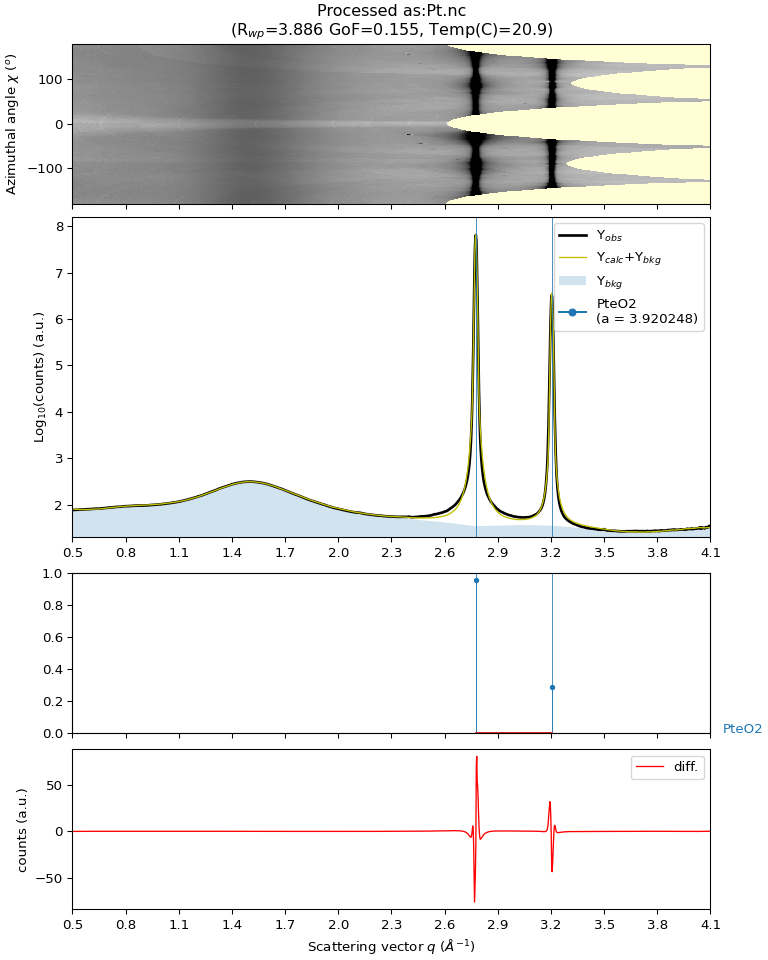

In [12]:
Pt_refiner = Refiner(
    nc_path = 'Pt.nc',
    phases = [{'cif_abs_path':'Pt.cif','phase_name':'PteO2','scale':1},],
    gsas2_scratch = pysuli_defaults['gsas2_scratch'],
    instrument_parameters_file = 'gsas2_scratch/gsas.instprm',
    q_range = [0.5,4.1],
    da_input_bkg = da_input_bkg 
)

Pt_refiner.refine_background(5)
Pt_refiner.set_lebail(True)
Pt_refiner.refine_cell_params()
Pt_refiner.refine_size_broadening()
Pt_refiner.refine_strain_broadening()
Pt_refiner.refine_background(10)
Pt_refiner.save_refinement()
Pt_refiner.plot_refinement_results()

***
### Third refinement
***

/Users/petermeshkov/.gsas2_scratch
/Users/petermeshkov/.gsas2_scratch/1722967417.90_AZF3Q61.tmp
/Users/petermeshkov/.gsas2_scratch/1722967417.90_AZF3Q61.tmp/data.xy read by Reader comma/tab/semicolon separated
Instrument parameters read: /Users/petermeshkov/Repos/pySULI/notebooks/example_data/xrd_refinement_with_gsas2/gsas2_scratch/gsas.instprm (G2 fmt) bank None
/Users/petermeshkov/Repos/pySULI/notebooks/example_data/xrd_refinement_with_gsas2/Pt.cif read by Reader CIF
gpx file saved as /Users/petermeshkov/.gsas2_scratch/1722967417.90_AZF3Q61.tmp/gsas.gpx
/Users/petermeshkov/Repos/pySULI/notebooks/example_data/xrd_refinement_with_gsas2/Zr.cif read by Reader CIF
gpx file saved as /Users/petermeshkov/.gsas2_scratch/1722967417.90_AZF3Q61.tmp/gsas.gpx
gpx file saved as /Users/petermeshkov/.gsas2_scratch/1722967417.90_AZF3Q61.tmp/gsas.gpx
gpx file saved as /Users/petermeshkov/.gsas2_scratch/1722967417.90_AZF3Q61.tmp/gsas.gpx
gpx file saved as /Users/petermeshkov/.gsas2_scratch/1722967417.90

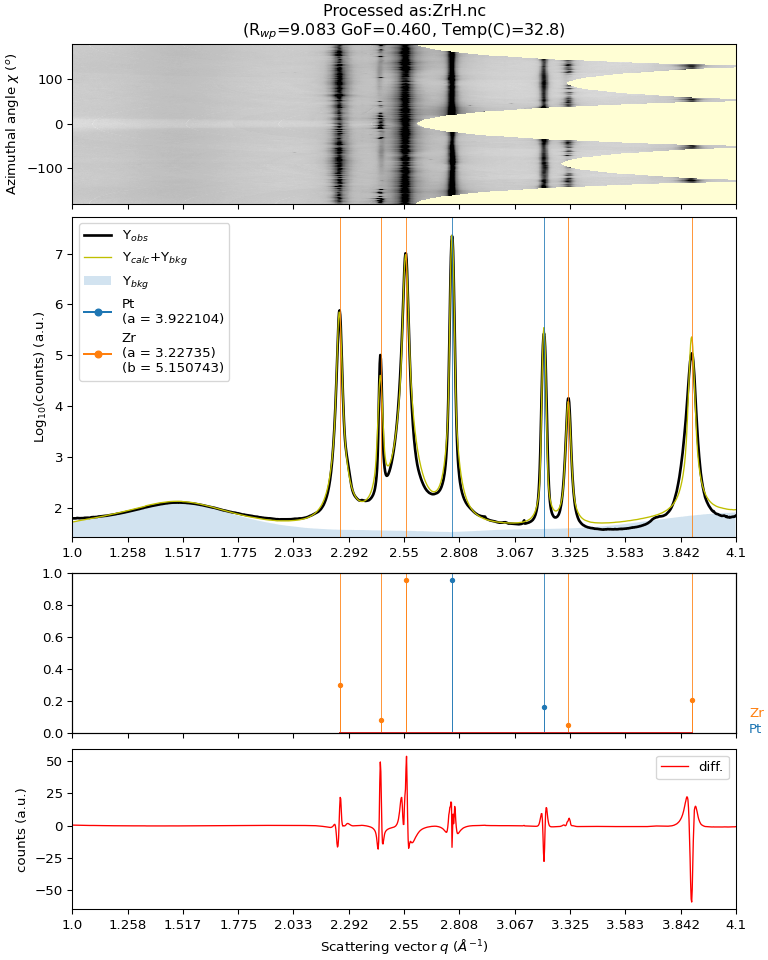

In [13]:
ZrH_refiner = Refiner(
    nc_path = 'ZrH.nc',
    phases = [
    {'cif_abs_path':'Pt.cif','phase_name':'Pt','scale':1},
    {'cif_abs_path':'Zr.cif','phase_name':'Zr','scale':1},
    ],
    gsas2_scratch = pysuli_defaults['gsas2_scratch'],
    instrument_parameters_file = 'gsas2_scratch/gsas.instprm',
    q_range=[1,4.1],
    da_input_bkg = da_input_bkg 
)

ZrH_refiner.refine_background(3)
ZrH_refiner.set_lebail(True)
ZrH_refiner.refine_cell_params()
ZrH_refiner.refine_size_broadening()
ZrH_refiner.refine_strain_broadening()
ZrH_refiner.refine_background(5)
ZrH_refiner.refine_cell_params()
ZrH_refiner.refine_size_broadening()
ZrH_refiner.refine_strain_broadening()
ZrH_refiner.save_refinement()
ZrH_refiner.plot_refinement_results()

In [14]:
#ZrH_refiner.cleanup()

In [15]:
#ZrH_refiner.cleanup_all()